1 . What is the goal of the model?

The objective of the model is to forecast the selling price of a used car using the available attributes. A second-hand car dealer company can utilize this model to predict the selling cost and buying cost of the car to gain maximum profit. 

2 . What are the attributes available in the dataset?

The dataset contains 6 columns, and the available attributes are not mentioned. However, for a second-hand car price prediction model, the typical attributes may include the car's year of purchase, kilometers driven, fuel type, brand, model, and condition.

3 . What machine learning algorithm will be used to train the model?

Random Forest Regressor is a good choice for this problem since it can handle both categorical and numerical data, can handle non-linear relationships between variables, and can reduce the risk of overfitting.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
car = pd.read_csv('/content/quikr_car.csv')

In [3]:
car.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [4]:
car.shape

(892, 6)

In [5]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [6]:
backup=car.copy()

In [8]:
car=car[car['year'].str.isnumeric()]

In [9]:
car['year']=car['year'].astype(int)

In [10]:
car['year']

0      2007
1      2006
2      2018
3      2014
4      2014
       ... 
886    2009
888    2018
889    2013
890    2014
891    2014
Name: year, Length: 842, dtype: int64

In [11]:
car['Price'].unique()

array(['80,000', '4,25,000', 'Ask For Price', '3,25,000', '5,75,000',
       '1,75,000', '1,90,000', '8,30,000', '2,50,000', '1,82,000',
       '3,15,000', '4,15,000', '3,20,000', '10,00,000', '5,00,000',
       '3,50,000', '1,60,000', '3,10,000', '75,000', '1,00,000',
       '2,90,000', '95,000', '1,80,000', '3,85,000', '1,05,000',
       '6,50,000', '6,89,999', '4,48,000', '5,49,000', '5,01,000',
       '4,89,999', '2,80,000', '3,49,999', '2,84,999', '3,45,000',
       '4,99,999', '2,35,000', '2,49,999', '14,75,000', '3,95,000',
       '2,20,000', '1,70,000', '85,000', '2,00,000', '5,70,000',
       '1,10,000', '4,48,999', '18,91,111', '1,59,500', '3,44,999',
       '4,49,999', '8,65,000', '6,99,000', '3,75,000', '2,24,999',
       '12,00,000', '1,95,000', '3,51,000', '2,40,000', '90,000',
       '1,55,000', '6,00,000', '1,89,500', '2,10,000', '3,90,000',
       '1,35,000', '16,00,000', '7,01,000', '2,65,000', '5,25,000',
       '3,72,000', '6,35,000', '5,50,000', '4,85,000', '3,29,5

In [12]:
car=car[car['Price']!='Ask For Price']
car['Price'] = car['Price'].str.replace(',', '').astype('Int32')

In [13]:
car['Price']

0       80000
1      425000
3      325000
4      575000
6      175000
        ...  
886    300000
888    260000
889    390000
890    180000
891    160000
Name: Price, Length: 819, dtype: Int32

In [14]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 819 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        819 non-null    object
 1   company     819 non-null    object
 2   year        819 non-null    int64 
 3   Price       819 non-null    Int32 
 4   kms_driven  819 non-null    object
 5   fuel_type   816 non-null    object
dtypes: Int32(1), int64(1), object(4)
memory usage: 42.4+ KB


In [15]:
car['kms_driven'].unique()

array(['45,000 kms', '40 kms', '28,000 kms', '36,000 kms', '41,000 kms',
       '25,000 kms', '24,530 kms', '60,000 kms', '30,000 kms',
       '32,000 kms', '48,660 kms', '4,000 kms', '16,934 kms',
       '43,000 kms', '35,550 kms', '39,522 kms', '39,000 kms',
       '55,000 kms', '72,000 kms', '15,975 kms', '70,000 kms',
       '23,452 kms', '35,522 kms', '48,508 kms', '15,487 kms',
       '82,000 kms', '20,000 kms', '68,000 kms', '38,000 kms',
       '27,000 kms', '33,000 kms', '46,000 kms', '16,000 kms',
       '47,000 kms', '35,000 kms', '30,874 kms', '15,000 kms',
       '29,685 kms', '1,30,000 kms', '19,000 kms', '54,000 kms',
       '13,000 kms', '38,200 kms', '22,000 kms', '50,000 kms',
       '13,500 kms', '3,600 kms', '45,863 kms', '60,500 kms',
       '12,500 kms', '18,000 kms', '13,349 kms', '29,000 kms',
       '44,000 kms', '42,000 kms', '14,000 kms', '49,000 kms',
       '36,200 kms', '51,000 kms', '1,04,000 kms', '33,333 kms',
       '33,600 kms', '5,600 kms', '7,500 km

In [16]:
car=car[car['kms_driven']!='Petrol']
car['kms_driven'] = [d.replace(',', '').replace('kms', '').strip() for d in car['kms_driven']]
car['kms_driven'] = [int(d) for d in car['kms_driven']]

<ipython-input-16-236ba146e78f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car['kms_driven'] = [d.replace(',', '').replace('kms', '').strip() for d in car['kms_driven']]
<ipython-input-16-236ba146e78f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car['kms_driven'] = [int(d) for d in car['kms_driven']]


In [17]:
car['kms_driven'].unique()

array([ 45000,     40,  28000,  36000,  41000,  25000,  24530,  60000,
        30000,  32000,  48660,   4000,  16934,  43000,  35550,  39522,
        39000,  55000,  72000,  15975,  70000,  23452,  35522,  48508,
        15487,  82000,  20000,  68000,  38000,  27000,  33000,  46000,
        16000,  47000,  35000,  30874,  15000,  29685, 130000,  19000,
        54000,  13000,  38200,  22000,  50000,  13500,   3600,  45863,
        60500,  12500,  18000,  13349,  29000,  44000,  42000,  14000,
        49000,  36200,  51000, 104000,  33333,  33600,   5600,   7500,
        26000,  24330,  65480, 200000,  59000,  99000,   2800,  21000,
        11000,  66000,   3000,   7000,  38500,  37200,  43200,  24800,
        45872,  40000,  11400,  97200,  52000,  31000, 175430,  37000,
        65000,   3350,  75000,  62000,  73000,   2200,  54870,  34580,
        97000,     60,  80200,   3200,      0,   5000,    588,  71200,
       175400,   9300,  56758,  10000,  56450,  56000,  32700,   9000,
      

In [18]:
car['fuel_type'].unique()

array(['Petrol', 'Diesel', nan, 'LPG'], dtype=object)

In [19]:
car = car.dropna(subset=['fuel_type'])

In [20]:
car['fuel_type'].unique()

array(['Petrol', 'Diesel', 'LPG'], dtype=object)

In [21]:
car.shape

(816, 6)

In [22]:
car['name']=car['name'].str.split().str.slice(0,3).str.join(' ')

In [23]:
car['name']

0         Hyundai Santro Xing
1         Mahindra Jeep CL550
3           Hyundai Grand i10
4      Ford EcoSport Titanium
6                   Ford Figo
                ...          
883        Maruti Suzuki Ritz
885            Tata Indica V2
886      Toyota Corolla Altis
888              Tata Zest XM
889        Mahindra Quanto C8
Name: name, Length: 816, dtype: object

In [24]:
car.reset_index(drop=True)

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
812,Tata Indica V2,Tata,2009,110000,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [25]:
car.describe()

,year,Price,kms_driven
count,816.000000,816.0,816.000000
mean,2012.444853,411717.615196,46275.531863
std,4.002992,475184.422264,34297.428044
min,1995.000000,30000.0,0.000000
25%,2010.000000,175000.0,27000.000000
50%,2013.000000,299999.0,41000.000000
75%,2015.000000,491250.0,56818.500000
max,2019.000000,8500003.0,400000.000000


In [26]:

car.shape

(816, 6)

In [27]:

car = car[car['Price'] < 6e6]

In [28]:
car.shape

(815, 6)

In [29]:
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
883,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
885,Tata Indica V2,Tata,2009,110000,30000,Diesel
886,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
888,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [30]:
car['company'].unique()

array(['Hyundai', 'Mahindra', 'Ford', 'Maruti', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat', 'Force',
       'Mercedes', 'Land', 'Jaguar', 'Jeep', 'Volvo'], dtype=object)

In [31]:
import seaborn as sns

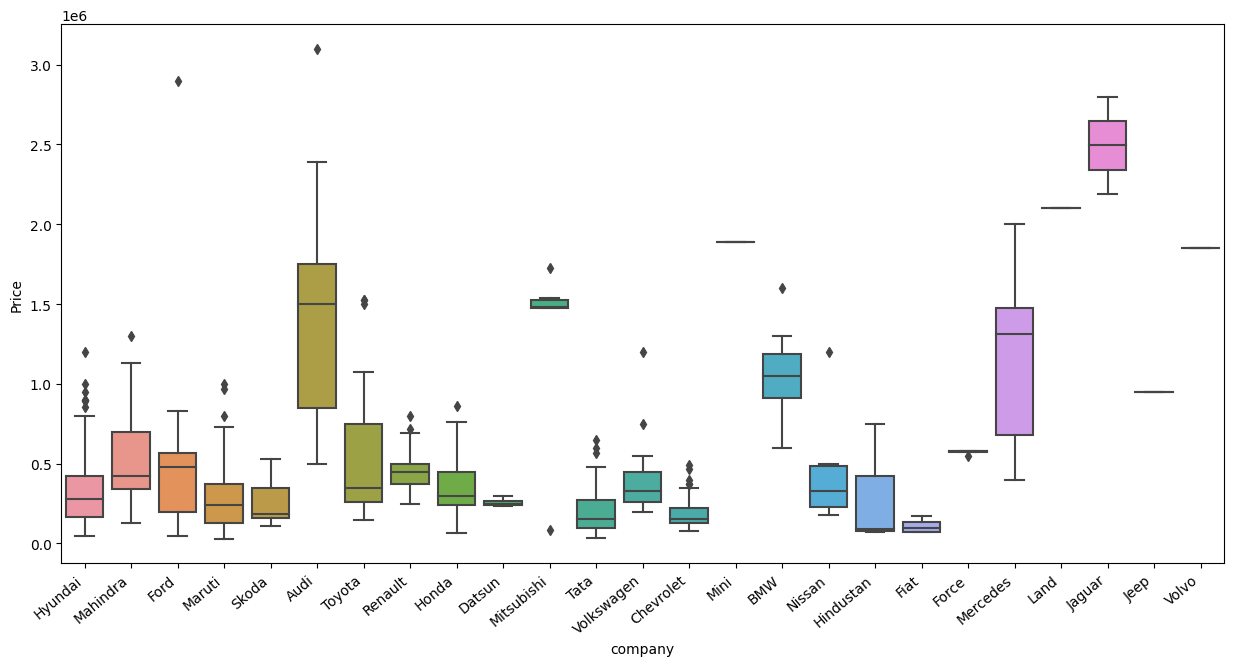

In [32]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='company',y='Price',data=car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

Checking relationship of Year with Price

<ipython-input-33-0da76f72d9f2>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')


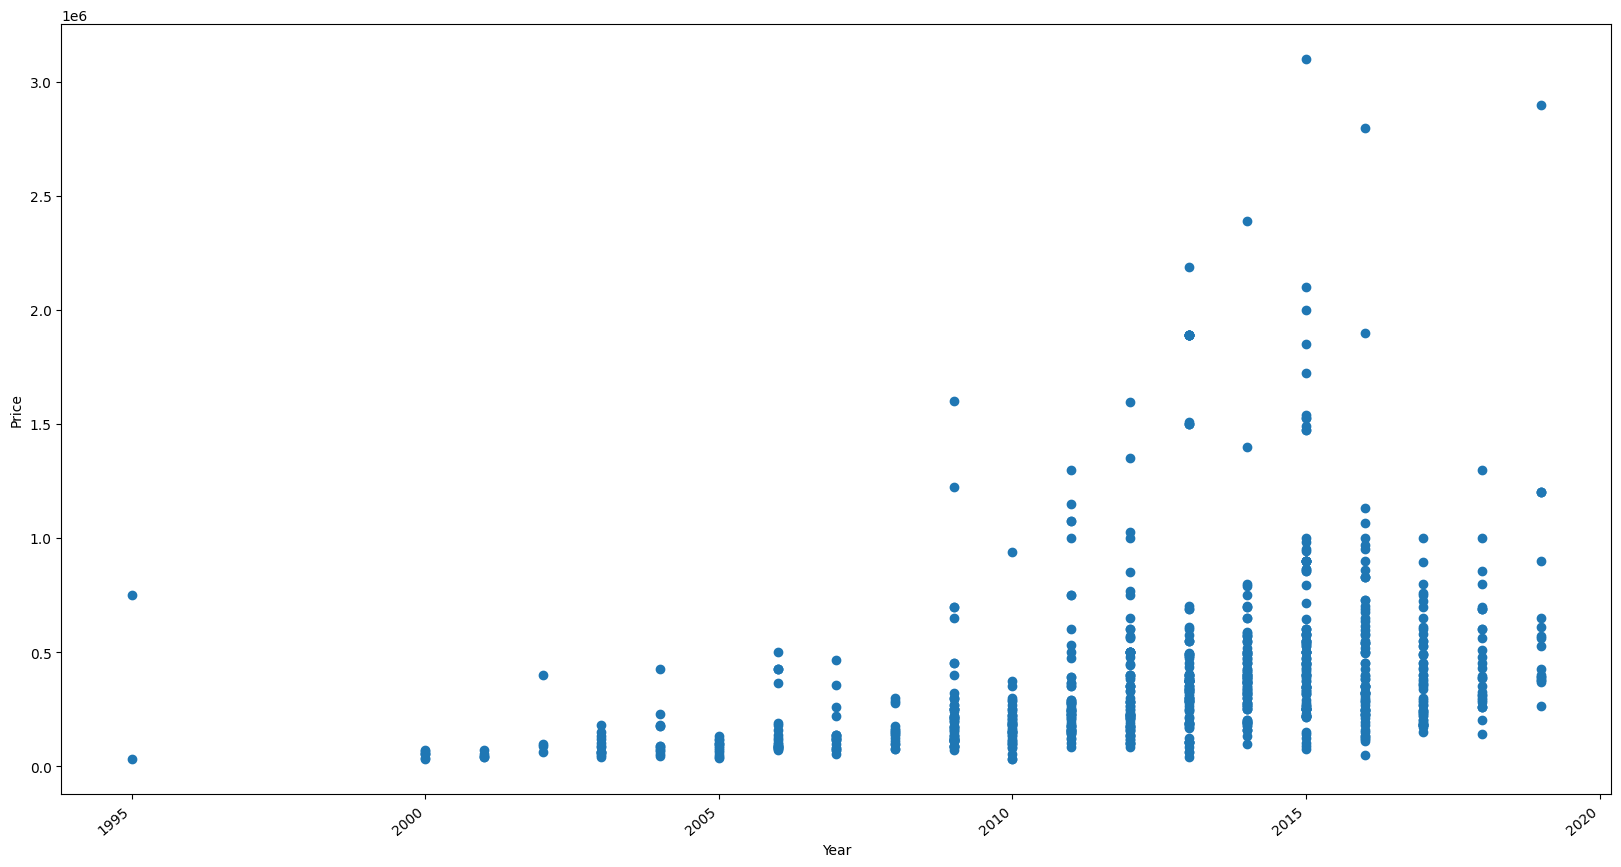

In [33]:
fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(x=car['year'], y=car['Price'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
ax.set_xlabel('Year')
ax.set_ylabel('Price')
plt.show()

Checking relationship of kms_driven with Price

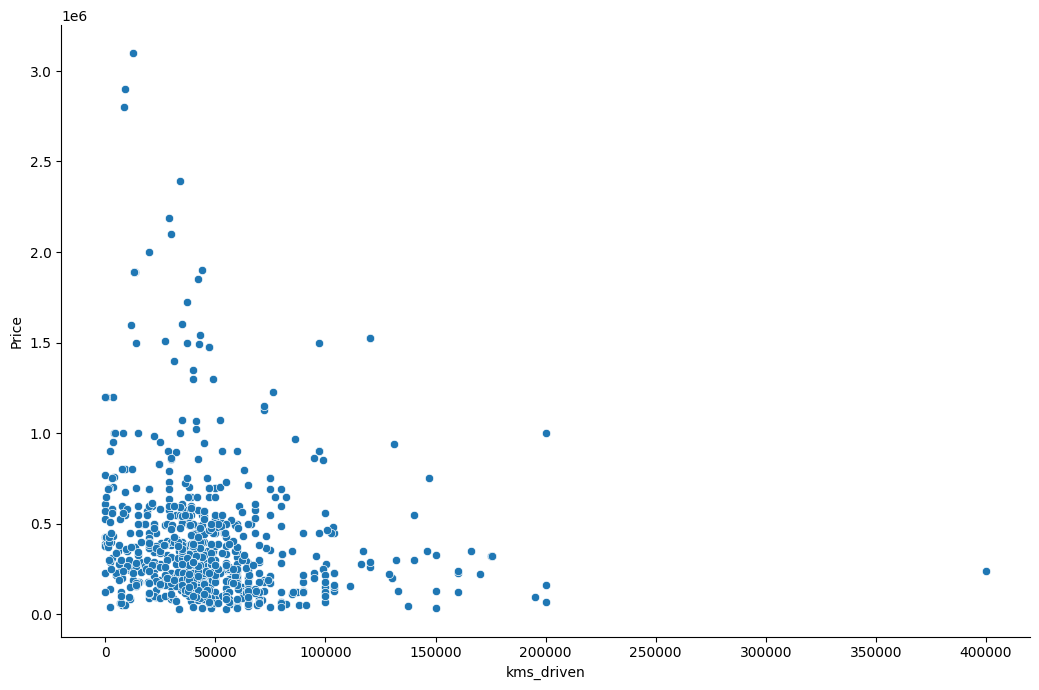

In [34]:
sns.relplot(x='kms_driven',y='Price',data=car,height=7,aspect=1.5)

Checking relationship of Fuel Type with Price

<Axes: xlabel='fuel_type', ylabel='Price'>

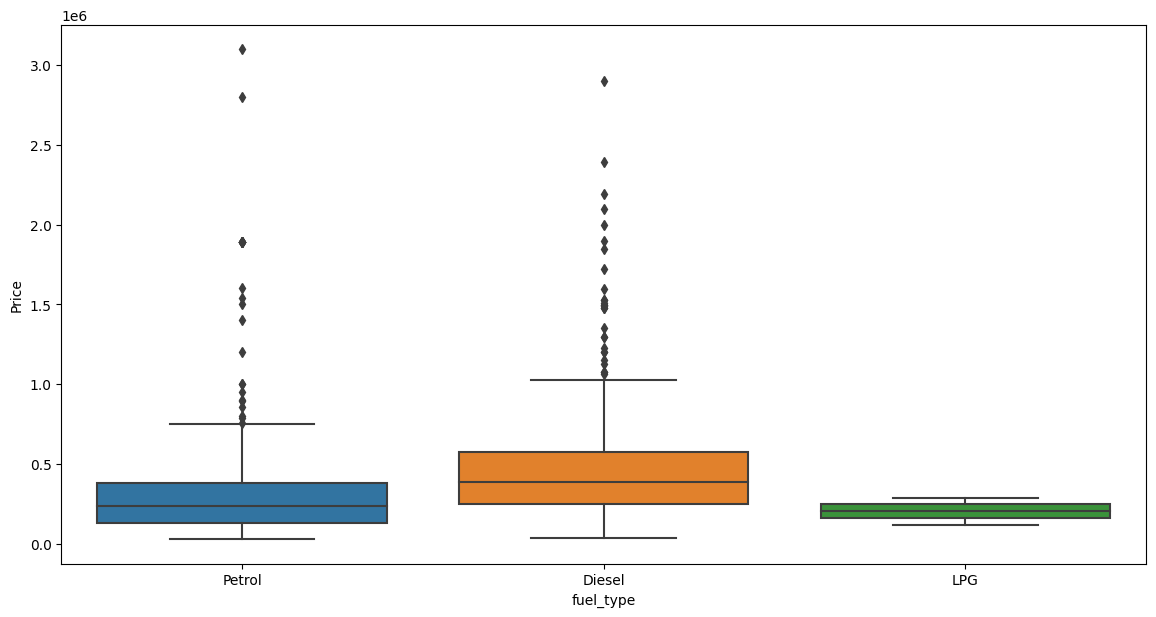

In [35]:
plt.subplots(figsize=(14,7))
sns.boxplot(x='fuel_type',y='Price',data=car)

Relationship of Price with FuelType, Year and Company mixed

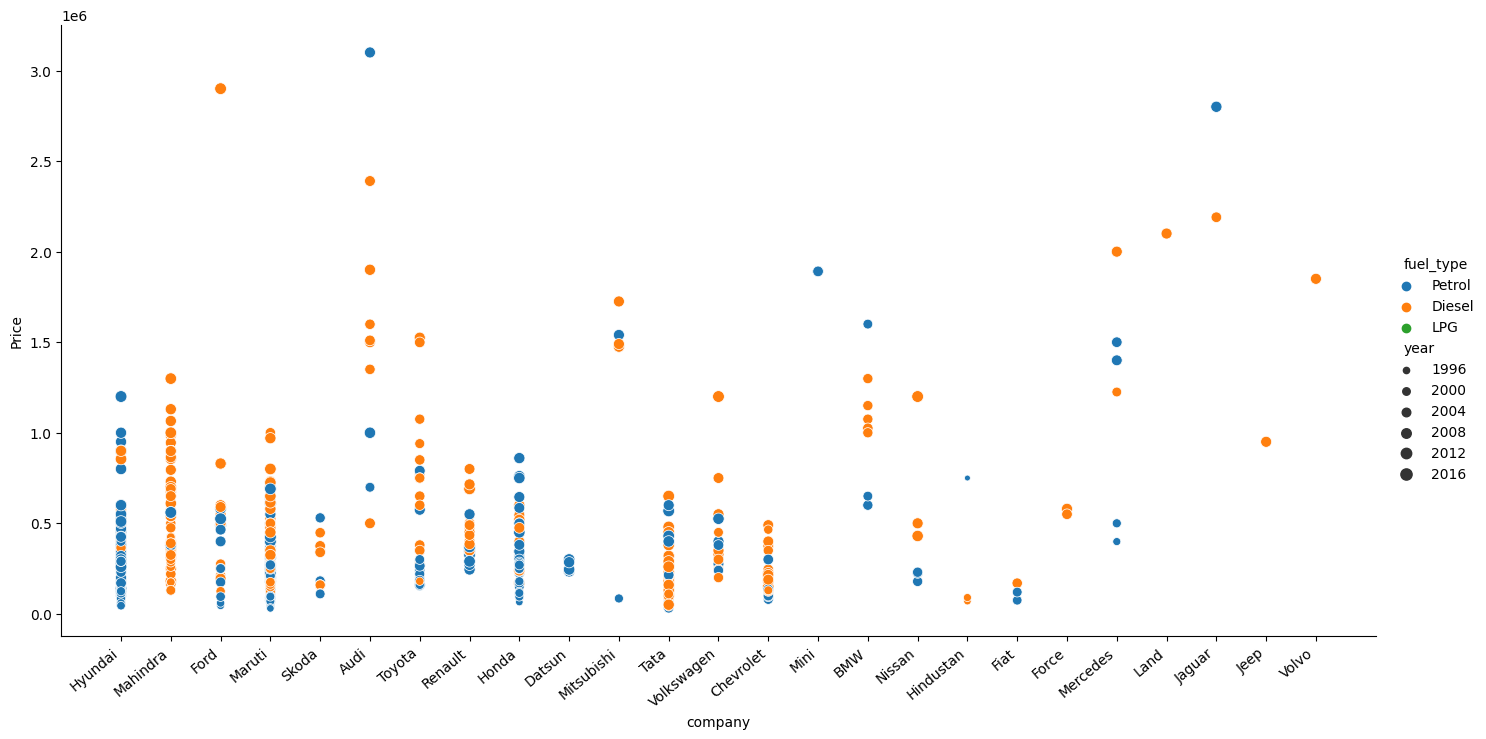

In [36]:
ax=sns.relplot(x='company',y='Price',data=car,hue='fuel_type',size='year',height=7,aspect=2)
ax.set_xticklabels(rotation=40,ha='right')

MODEL

In [37]:
x = car.drop(columns='Price')
y = car['Price']

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2)

In [39]:
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [97]:
ohe = OneHotEncoder()
ohe.fit(x[['name','company','fuel_type']])

OneHotEncoder()

In [98]:
column_trans = make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name' , 'company' , 'fuel_type']) , remainder='passthrough')

In [100]:
rf = RandomForestClassifier(n_estimators=100)
pipe = make_pipeline(column_trans,rf)

In [101]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('randomforestclassifier', RandomForestClassifier())])

In [102]:
y_pred = pipe.predict(x_test)

In [63]:
r2_score(y_test,y_pred)

0.8257263262590417